<a href="https://colab.research.google.com/github/tusharmaaa/-/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
#reading the csv data file
df =  pd.read_csv('drive/MyDrive/ColabNotebooks/Datasets/Breast_Cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape


(569, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df = df.drop(['Unnamed: 32'],axis=1)

In [ ]:
df.shape

(569, 32)

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


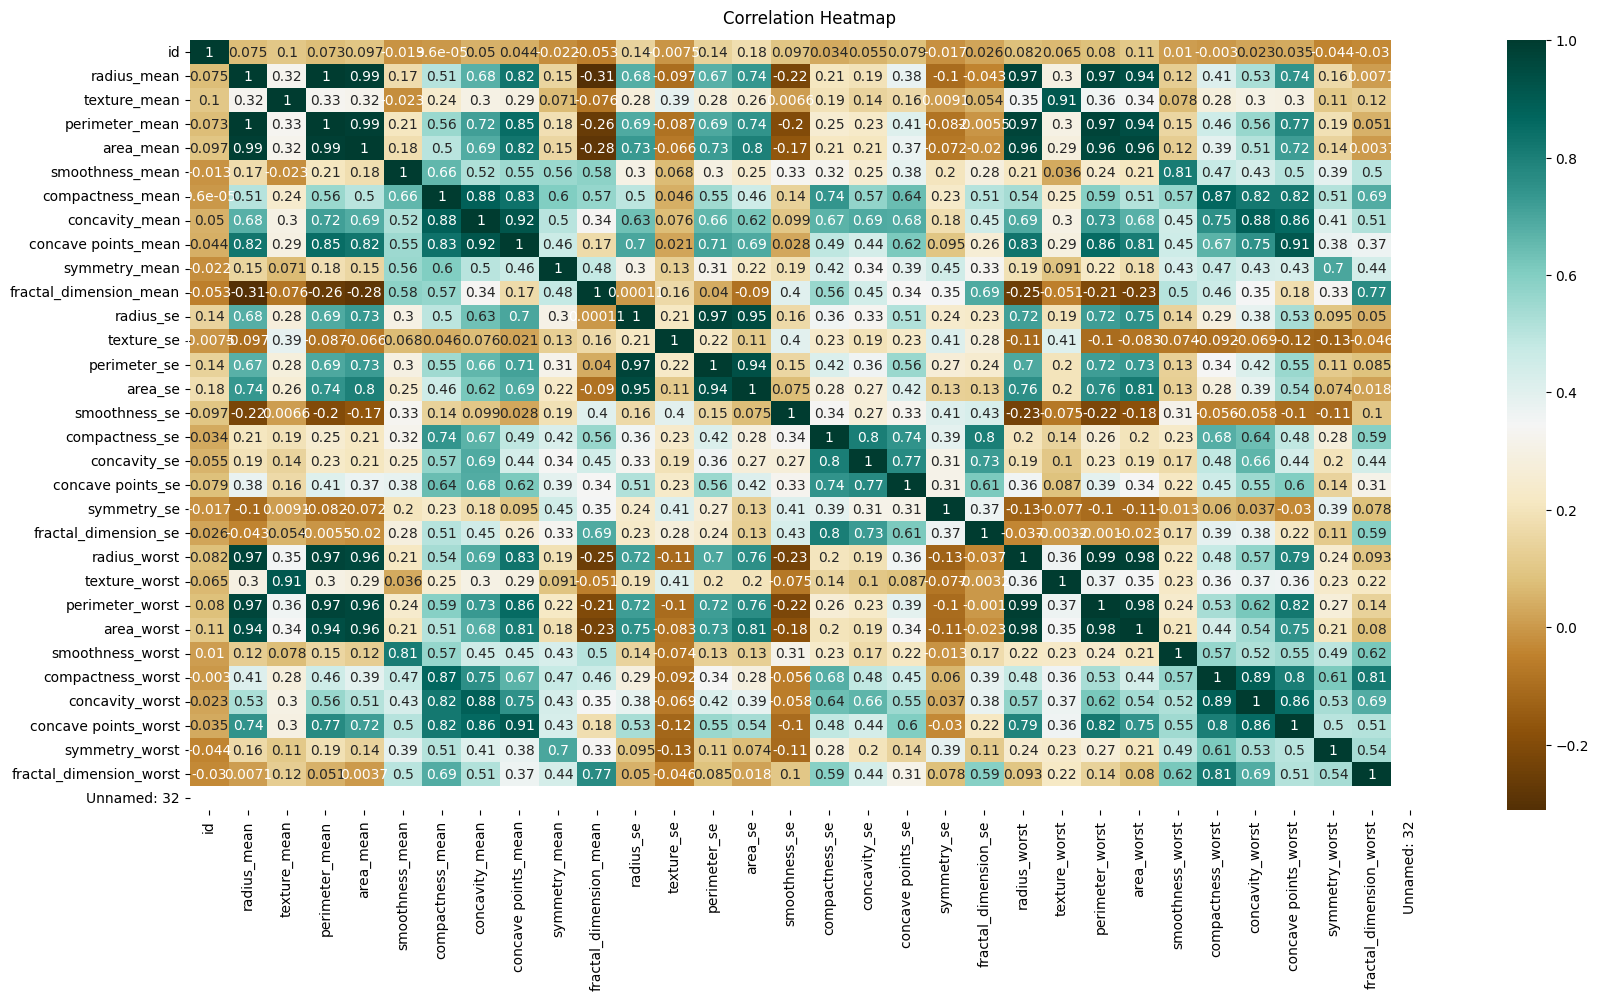

In [ ]:
# PLOTTING HEATMAP FOR VISUALISING CORRELATION BETWEEN FEATURES
plt.figure(figsize=(20, 10))
heatmap = sb.heatmap(df.corr(),cmap='BrBG',annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<Axes: xlabel='concavity_mean', ylabel='Density'>

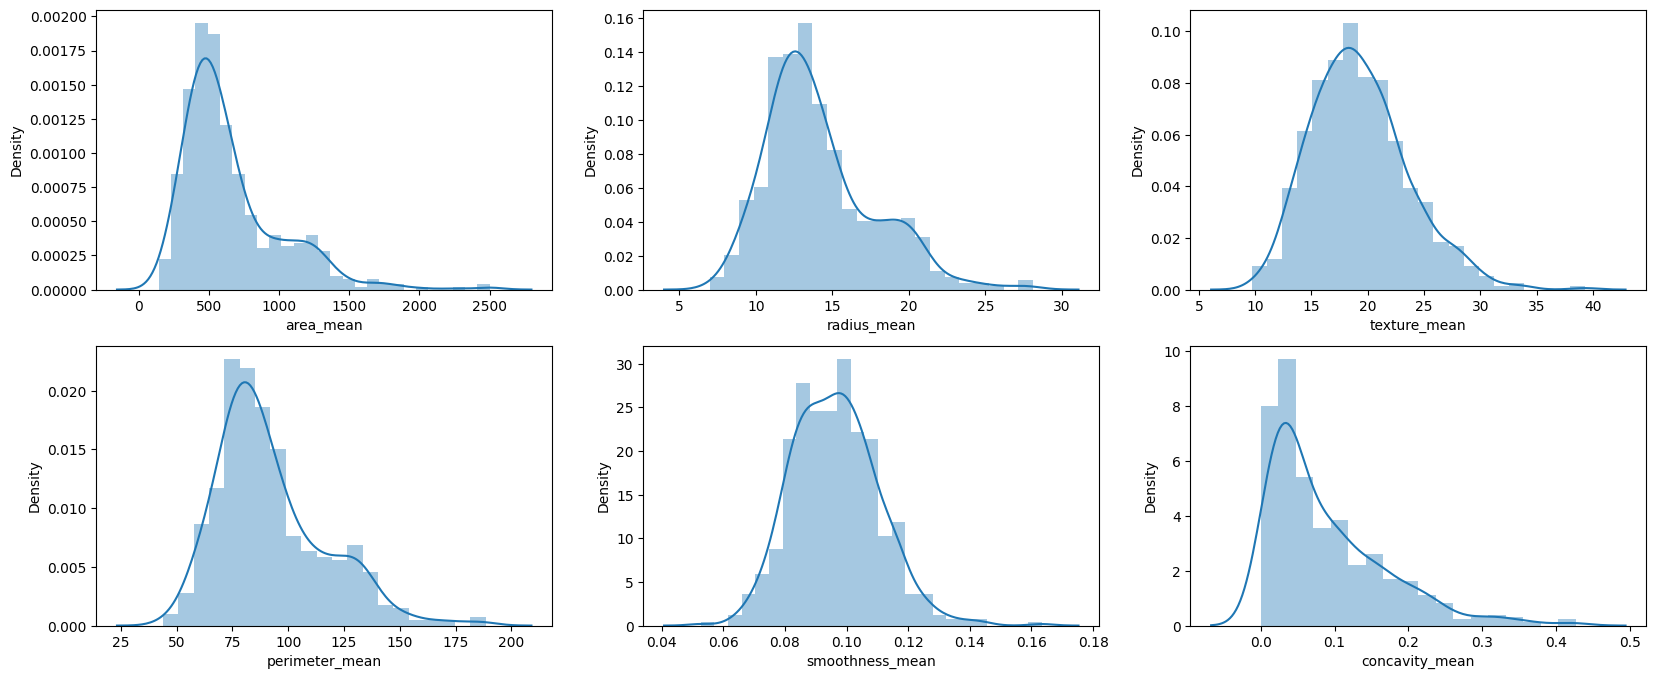

In [ ]:
#CHECKING DISTRIBUTION OF DATA IN FEATURES
fig, axes = plt.subplots(2,3,figsize=(20,8))
sb.distplot(df['area_mean'],ax = axes[0,0])
sb.distplot(df['radius_mean'],ax = axes[0,1])
sb.distplot(df['texture_mean'],ax = axes[0,2])
sb.distplot(df['perimeter_mean'],ax = axes[1,0])
sb.distplot(df['smoothness_mean'],ax = axes[1,1])
sb.distplot(df['concavity_mean'],ax = axes[1,2])

In [ ]:
from sklearn.model_selection import train_test_split
Train = df.drop(columns = "diagnosis")
Target = df["diagnosis"]
train, test = train_test_split(df, test_size=0.2, random_state=122)
X_train, X_test, y_train, y_test = train_test_split(Train, Target, test_size = 0.2, random_state = 122)
print('Dimension of training data: ', train.shape)
print('Dimension of test data: ', test.shape)

# see shape of splited data

print("x_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

Dimension of training data:  (455, 32)
Dimension of test data:  (114, 32)
x_train shape:  (455, 31)
y_train shape:  (455,)
x_test shape:  (114, 31)
y_test shape:  (114,)


In [ ]:
Xtrain = train.drop(columns=['diagnosis'], axis=1)
ytrain = train['diagnosis']

Xtest = test.drop(columns=['diagnosis'], axis=1)
ytest= test['diagnosis']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
ytrain_encoded = encoder.fit_transform(ytrain)
ytest_encoded = encoder.transform(ytest)

In [ ]:
df['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, shuffle = True, random_state=7)
model = LogisticRegression(max_iter = 3000)
model.fit(Xtest_scaled, ytest_encoded)
result = model.score(Xtest_scaled, ytest_encoded)
print('Accuracy: %.3f%%' % (result.mean()*100.0))

Accuracy: 96.491%


k-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

num_folds = 10
kfold = KFold(n_splits=10, shuffle = True, random_state=7)
model = KNeighborsClassifier()
results = cross_val_score(model, Xtest_scaled, ytest_encoded, cv=kfold)
print('Accuracy: %.3f%%' % (results.mean()*100.0))

Accuracy: 96.439%


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_trees = 100
max_features = 3

kfold = KFold(n_splits=10, shuffle = True, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, Xtest_scaled, ytest_encoded, cv=kfold)
print('Accuracy: %.3f%%' % (results.mean()*100.0))

Accuracy: 95.455%


Naive Bayes

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

kfold = KFold(n_splits=10, shuffle = True,random_state=7)
model = GaussianNB()
results = cross_val_score(model, Xtest_scaled, ytest_encoded, cv=kfold)
print('Accuracy: %.3f%%' % (results.mean()*100.0))

Accuracy: 95.455%


Support Vector Machines

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, shuffle = True, random_state=7)
model = SVC()
results = cross_val_score(model, Xtest_scaled, ytest_encoded, cv=kfold)
print('Accuracy: %.3f%%' % (results.mean()*100.0))

Accuracy: 97.273%


Ada boost classification

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier


num_trees = 30
seed=7
kfold = KFold(n_splits=10, shuffle = True,random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, Xtest_scaled, ytest_encoded, cv=kfold)

print('Accuracy: %.3f%%' % (results.mean()*100.0))

Accuracy: 94.621%


LR: 0.937879 (0.081368)
LDA: 0.930303 (0.083937)
KNN: 0.964394 (0.059656)
CART: 0.938636 (0.076094)
NB: 0.954545 (0.083814)
SVM: 0.972727 (0.058210)


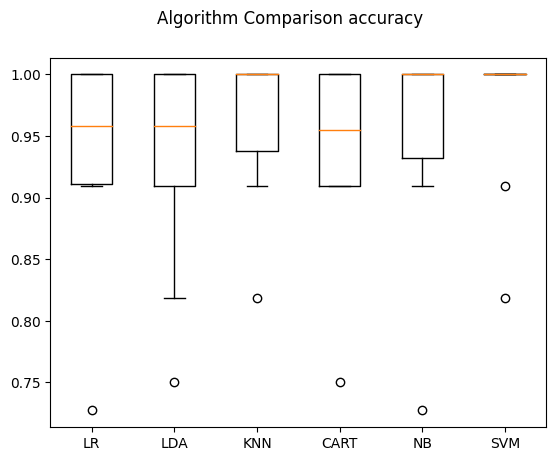

LR: 0.982381 (0.032805)
LDA: 0.921667 (0.123390)
KNN: 0.965000 (0.077621)
CART: 0.939881 (0.070239)
NB: 0.980595 (0.032279)
SVM: 0.985952 (0.032584)


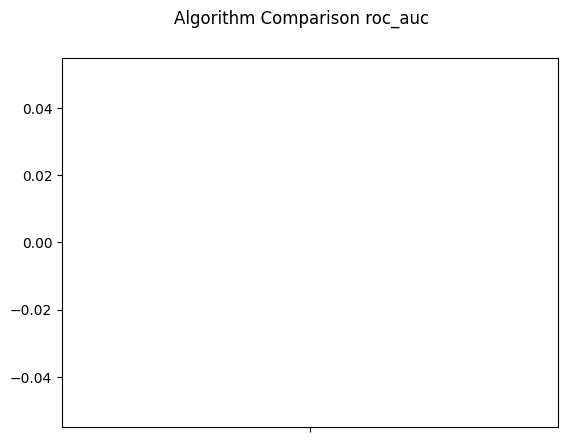

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        79
           1       0.94      0.97      0.96        35

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        79
           1       1.00      0.94      0.97        35

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        79
           1       0.91      0.91      0.91        35

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

              preci

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report


# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
results1 = []
names1 = []
results2 = []
names2 = []

scoring = 'accuracy'
scoring1 = 'roc_auc'

for name, model in models:

  kfold = KFold(n_splits=10, shuffle= True,random_state=7)
  cv_results = cross_val_score(model, Xtest_scaled, ytest_encoded, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison accuracy')

ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

for name, model in models:

  kfold = KFold(n_splits=10, shuffle= True,random_state=7)
  cv_results = cross_val_score(model, Xtest_scaled, ytest_encoded, cv=kfold, scoring=scoring1)
  results.append(cv_results)
  names.append(name)
  msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison roc_auc')

ax = fig.add_subplot(111)
pyplot.boxplot(results1)
ax.set_xticklabels(names1)
pyplot.show()


for name, model in models:

  kfold = KFold(n_splits=10, shuffle= True,random_state=7)
  cv_results = cross_val_score(model, Xtest_scaled, ytest_encoded, cv=kfold)
  results.append(cv_results)
  names.append(name)
  model.fit(Xtrain_scaled, ytrain_encoded)
  predicted = model.predict(Xtest_scaled)
  report = classification_report(ytest_encoded, predicted)
  print(report)


